C:\Users\raman\AppData\Local\Temp\ipykernel_23376\1171232026.py:9: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_data = pd.read_csv(file_path, parse_dates=['Date'])


Historical data loaded successfully.
Real-time data loaded successfully.


C:\Users\raman\AppData\Local\Temp\ipykernel_23376\1171232026.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Data preprocessing completed.
Data preprocessing completed.


C:\Users\raman\AppData\Local\Temp\ipykernel_23376\1171232026.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\raman\AppData\Local\Temp\ipykernel_23376\1171232026.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_SMA_{window}'] = df[column].rolling(window=window).mean()


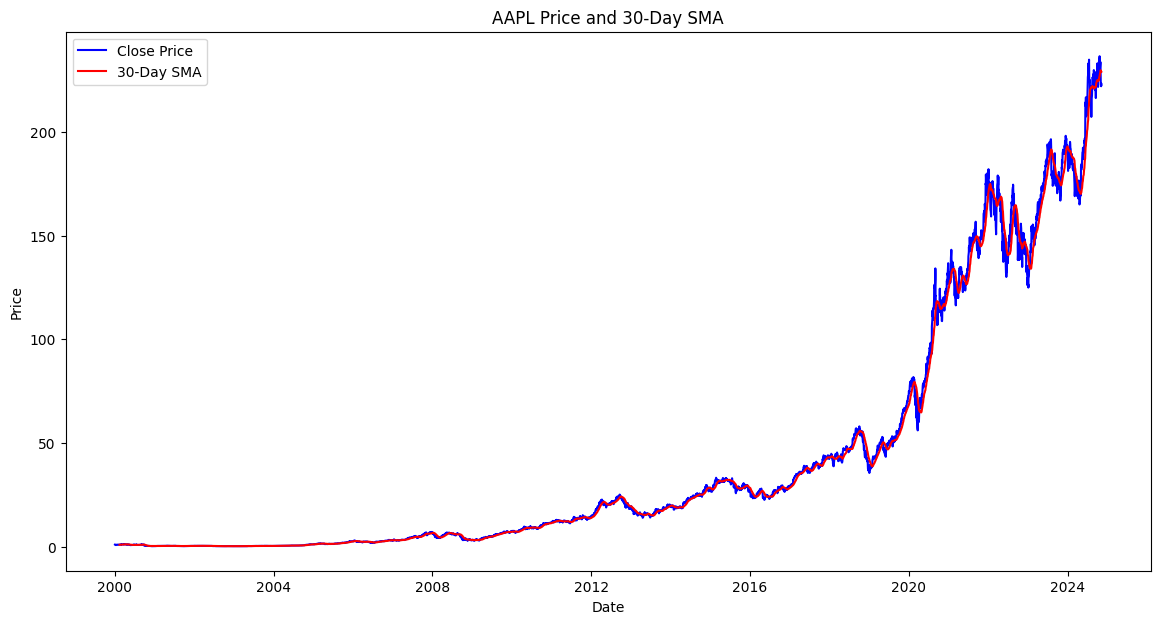

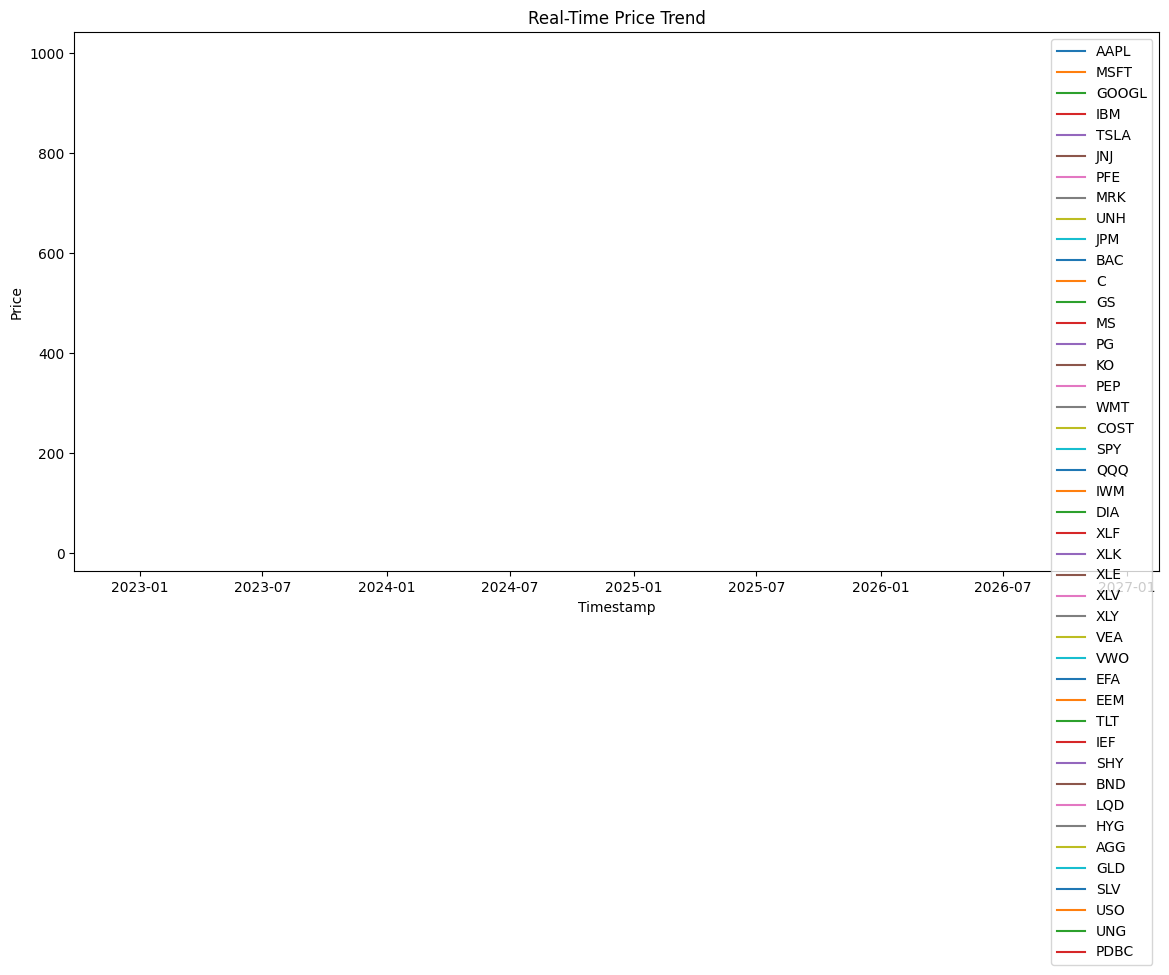

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load historical data
def load_historical_data(file_path="C:/Users/raman/Documents/historical_price_data.csv"):
    try:
        historical_data = pd.read_csv(file_path, parse_dates=['Date'])
        print("Historical data loaded successfully.")
        return historical_data
    except FileNotFoundError:
        print("Historical data file not found.")
        return pd.DataFrame()

# Load real-time data
def load_real_time_data(file_path="C:/Users/raman/Documents/real_time_price_data.csv"):
    try:
        real_time_data = pd.read_csv(file_path, parse_dates=['Timestamp'])
        print("Real-time data loaded successfully.")
        return real_time_data
    except FileNotFoundError:
        print("Real-time data file not found.")
        return pd.DataFrame()

# Data preprocessing
def preprocess_data(df):
    if df.empty:
        return df
    
    # Convert date columns to datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Drop duplicate entries if any
    df = df.drop_duplicates()
    
    # Handle missing values by filling with forward fill method
    df = df.fillna(method='ffill')

    print("Data preprocessing completed.")
    return df

# Calculate simple moving average (SMA) for analysis
def calculate_moving_average(df, column='Close', window=30):
    # Convert the column to numeric, coercing errors to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Drop rows where the column is NaN (optional, based on your data handling)
    df = df.dropna(subset=[column])
    
    # Calculate the moving average
    df[f'{column}_SMA_{window}'] = df[column].rolling(window=window).mean()
    return df


# Plot historical data with SMA
def plot_historical_data(df, asset, sma_window=30):
    if df.empty:
        print(f"No data available for {asset}.")
        return
    
    # Filter data for a specific asset
    asset_data = df[df['Asset'] == asset]
    
    # Plotting
    plt.figure(figsize=(14, 7))
    plt.plot(asset_data['Date'], asset_data['Close'], label='Close Price', color='blue')
    plt.plot(asset_data['Date'], asset_data[f'Close_SMA_{sma_window}'], label=f'{sma_window}-Day SMA', color='red')
    plt.title(f'{asset} Price and {sma_window}-Day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function to process historical and real-time data
def process_and_analyze_data():
    # Load and preprocess data
    historical_data = load_historical_data()
    real_time_data = load_real_time_data()

    historical_data = preprocess_data(historical_data)
    real_time_data = preprocess_data(real_time_data)

    # Calculate moving average for historical data
    historical_data = calculate_moving_average(historical_data)

    # Plot historical data and SMA for an example asset
    asset_to_plot = 'AAPL'  # Change this to any asset you want to visualize
    plot_historical_data(historical_data, asset=asset_to_plot)

    # Analyzing trends in real-time data (example)
    if not real_time_data.empty:
        # Plot the last known price for all assets
        plt.figure(figsize=(14, 7))
        for asset in real_time_data['Asset'].unique():
            asset_data = real_time_data[real_time_data['Asset'] == asset]
            plt.plot(asset_data['Timestamp'], asset_data['Price'], label=asset)
        
        plt.title('Real-Time Price Trend')
        plt.xlabel('Timestamp')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Execute the data processing and analysis
process_and_analyze_data()
